# Problem

$\blacktriangleright$ solve the incompressible Navier-Stokes Equations, using the FEM/Galerkin for space discretisation while the Crank-Nicholson as the reference time scheme: with an implicit treatment of the non-linear term and using Newton method for the non-linearities
$\bullet$ The incompressible NS problem on $\Omega\in [-1,1]$ square domain reads.
\begin{equation}
    \begin{cases}
        \frac{\partial u}{\partial t} -\mu\Delta u + (u\cdot\nabla)u +\nabla p=f &\qquad in\thinspace \Omega \times (0,T)\\
        \text{div}u=0 &\qquad in\thinspace \Omega \times (0,T)\\
        u=u_0 &\qquad in\thinspace \Omega, t=0\\
        (-pI+\nu\nabla u)\cdot \hat{n}=h &\qquad on\thinspace \Gamma_{bottom}\\
        u=g &\qquad on\thinspace \partial \Omega/\Gamma_{bottom}\\
    \end{cases}
\end{equation}
employing the following forcing term $f$. Moreover, we know the exact solution of the velocity $u$ and the exact analytical formula of the pressure $p$. The initial conditions will be the solution of the associated Stokes problem of the full NS problem.
$$
\begin{equation*}
    f=\begin{bmatrix}
        -\cos(x)\sin(y)(\cos(t)+2\nu\sin(t))\\
        \sin(x)\cos(y)(\cos(t)+2\nu\sin(t))
    \end{bmatrix}
    \quad
    u_{ex}=\begin{bmatrix}
        -\cos(x)\sin(y)\sin(t)\\
        \sin(x)\cos(y)\sin(t)
    \end{bmatrix}\quad
    p_{ex}=-\frac{1}{4}(\cos(2x)+\cos(2y))(\sin(t))^2
\end{equation*}
$$
the $g$ term can be imposed by doing the following calculations on the borders
$$
\begin{align}
    &x=1,1\le y\le 0 \quad u_{ex}=\begin{bmatrix}
        -\sin(y)\sin(t)\\
        \sin(1)\cos(y)\sin(t)
    \end{bmatrix} \\
    &1 \le x \le 0,y=0 \quad u_{ex}=\begin{bmatrix}
        -\cos(x)\sin(1)\sin(t)\\
        \sin(x)\sin(t)
    \end{bmatrix} \\
    &x=0, 1\le y \le 0\quad u_{ex}=\begin{bmatrix}
        -\sin(y)\sin(t)\\
        0
\end{bmatrix}
\end{align}
$$
Compiling the Neumann condition
$$
\begin{align*}
    &\nabla u_{ex}=\begin{bmatrix}
        \sin(x)\sin(y)\sin(t) & -\cos(x)\cos(y)\sin(t)\\
        \cos(x)\cos(y)\sin(t) & -\sin(x)\sin(y)\sin(t)
    \end{bmatrix}\implies\nabla u_{ex}(y=0)=\begin{bmatrix}
        0 & -\cos(x)\sin(t)\\
        \cos(x)\sin(t) & 0
    \end{bmatrix}\\
    &\nabla u_{ex}(y=0)\cdot n = \begin{bmatrix}
        0 & -\cos(x)\sin(t)\\
        \cos(x)\sin(t) & 0
    \end{bmatrix}\cdot \begin{bmatrix}
        0 \\
        -1
    \end{bmatrix}\implies \boxed{\nabla u_{ex}(y=0)\cdot \hat{n} = \begin{bmatrix}
        \cos(x)\sin(t)\\
        0
    \end{bmatrix}}
\end{align*}
$$

$$
\begin{align*}
    -p_{ex}I\hat{n}=-p_{ex}\begin{bmatrix}
        1 & 0\\
        0 & 1
    \end{bmatrix}
    \begin{bmatrix}
        0\\
        -1
    \end{bmatrix}=\begin{bmatrix}
        0\\
        p_{ex}
    \end{bmatrix}
\end{align*}$$
therefore the value of $h$ on the boundary is a 2D vector
$$\begin{align*}
    (-p_{ex}I+\nu\nabla u)\hat{n}=\boxed{\begin{bmatrix}
        \nu\cos(x)\sin(t)\\
        p_{ex}
    \end{bmatrix}=h}
\end{align*}$$

$1. $ Crank-Nicholson (fully implicit, for the advection term) for Time discretisation and Newton Method for the treatment of the advection-non-linear term
$$
\begin{align*}
    (u^*\cdot\nabla) u^{**}&=\bigg(\bigg(\frac{u^{n+1}+u^n}{2}\bigg)\cdot\nabla\bigg)\bigg(\frac{u^{n+1}+u^n}{2}\bigg)\\
    &=\frac{1}{4}\underbrace{(u^{n+1}\cdot\nabla)u^{n+1}}_{\text{Newton}}+\frac{1}{4}(u^{n+1}\cdot\nabla)u^{n}+\frac{1}{4}(u^n\cdot\nabla)u^{n+1}+\frac{1}{4}(u^n\cdot\nabla)u^{n}\\
    &\rightarrow \frac{1}{4}(u^{n}\cdot\nabla)u^{n+1}+\frac{1}{4}(u^{n+1}\cdot\nabla)u^n -\frac{1}{4}(u^n\cdot\nabla)u^n +\frac{1}{4}(u^n\cdot\nabla)u^{n} \\
    &=\frac{1}{2}(u^n\cdot\nabla)u^{n+1}+\frac{1}{2}(u^{n+1}\cdot\nabla)u^{n}
\end{align*}$$

$2.$ The time discretisation of the time-dependent problem and its weak form will be
$$
\begin{align*}
    \frac{1}{\Delta t}\int_{\Omega} u^{n+1}vd\Omega +\frac{1}{2}\int_{\Omega}\nu \nabla u^{n+1}:\nabla vd\Omega +\int_{\Omega}(u^*\cdot\nabla)u^{**}vd\Omega -\frac{1}{2}\int_{\Omega}p^{n+1}\text{div}vd\Omega \\+\int_{\Omega}q\text{div}u^{n+1}d\Omega=-\frac{1}{2}\int_{\Omega}\nu\nabla u^n:\nabla vd\Omega +\frac{1}{\Delta t}\int_{\Omega}u^n v d\Omega -\frac{1}{2}\int_{\Omega}\nabla p^n v d\Omega \\+2\int_{\Gamma}hv\hat{n}d\Gamma+\frac{1}{2}\int_{\Omega}(f^n+f^{n+1})vd\Omega
    \end{align*}
$$
Now including the CN+Newton non-linear term of advection, the Weak form to implement, reads
$$
\begin{align*}
    \frac{1}{\Delta t}\int_{\Omega} u^{n+1}vd\Omega +\frac{1}{2}\int_{\Omega}\nu \nabla u^{n+1}:\nabla vd\Omega +\frac{1}{2}\int_{\Omega}(u^n\cdot\nabla)u^{n+1}vd\Omega +\frac{1}{2}\int_{\Omega}(u^{n+1}\cdot\nabla)u^{n}vd\Omega-\frac{1}{2}\int_{\Omega}p^{n+1}\text{div}vd\Omega \\+\int_{\Omega}q\text{div}u^{n+1}d\Omega=-\frac{1}{2}\int_{\Omega}\nu\nabla u^n:\nabla vd\Omega +\frac{1}{\Delta t}\int_{\Omega}u^n v d\Omega -\frac{1}{2}\int_{\Omega}\nabla p^n v d\Omega \\+2\int_{\Gamma}hv\hat{n}d\Gamma+\frac{1}{2}\int_{\Omega}(f^n+f^{n+1})vd\Omega
\end{align*}$$

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

In [ ]:
from firedrake import *
import matplotlib.pyplot as plt
import numpy as np

from firedrake.petsc import PETSc

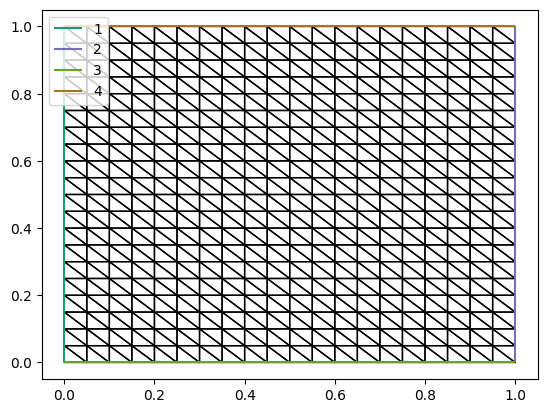

In [ ]:
n=20
mesh=UnitSquareMesh(n,n)
fig, ax = plt.subplots()
triplot(mesh, axes=ax)
ax.legend(loc='upper left')

In [ ]:
V=VectorFunctionSpace(mesh,'P',2)
Q=FunctionSpace(mesh,'P',1)
W=MixedFunctionSpace([V,Q])

x=SpatialCoordinate(mesh)
nu=0.01
T=1
dt=1/128
t_=Constant(0)
p_ex=-1/4*(cos(2*x[0])+cos(2*x[1]))*sin(t_)**2
u_1=as_vector((-sin(x[1])*sin(t_),0))
u_2=as_vector((-cos(1)*sin(x[1])*sin(t_),sin(1)*cos(x[1])*sin(t_)))
u_4=as_vector((-cos(x[0])*sin(1)*sin(t_),sin(x[0])*cos(1)*sin(t_)))

h=as_vector((nu*cos(x[0])*sin(t_),p_ex))


f=as_vector((-cos(x[0])*sin(x[1])*(cos(t_)+2*nu*sin(t_)),\
             sin(x[0])*cos(x[1])*(cos(t_)+2*nu*sin(t_))))

u_ex=as_vector((-cos(x[0])*sin(x[1])*sin(t_),sin(x[0])*cos(x[1])*sin(t_)))


bc_1=DirichletBC(W.sub(0),u_1,1)
bc_2=DirichletBC(W.sub(0),u_2,2)
bc_4=DirichletBC(W.sub(0),u_4,4)
bcsU=(bc_1,bc_2,bc_4)


In [ ]:
def CN_Newton(u,v,p,q,nu,dt,u_old,h,p_old,f_old,f_new):
  a=1/dt*inner(u,v)*dx\
    +nu*inner(grad(u),grad(v))*dx\
    +1/2*dot(dot(grad(u_old),u),v)*dx\
    +1/2*dot(dot(grad(u),u_old),v)*dx\
    -1/2*p*div(v)*dx\
    +q*div(u)*dx

  L=+1/dt*inner(u_old,v)*dx\
     -nu*inner(grad(u_old),grad(v))*dx\
    -1/2*dot(grad(p_old),v)*dx\
    +dot(h,v)*ds(3)\
    +1/2*dot(f_old,v)*dx\
    +1/2*dot(f_new,v)*dx
  return a,L


def stokes_solver(u,v,p,q,nu,h,f):
  a= +nu*inner(grad(u),grad(v))*dx\
     -p*div(v)*dx\
     +q*div(u)*dx
  L=+dot(h,v)*ds(3)\
    +dot(f,v)*dx
  return a,L

In [ ]:
nsp = MixedVectorSpaceBasis (W, [W. sub (0) ,VectorSpaceBasis ( constant = True )])

firedrake:WARNING No comm specified for VectorSpaceBasis, COMM_WORLD assumed


In [ ]:
u,p=TrialFunctions(W)
v,q=TestFunctions(W)

wh_init=Function(W)
a_stokes,L_stokes=stokes_solver(u,v,p,q,nu,h,f)
problem_stokes=LinearVariationalProblem(a_stokes,L_stokes,wh_init,bcsU)
solver_stokes=LinearVariationalSolver(problem_stokes,nullspace=nsp)
uh_init,ph_init=wh_init.subfunctions

In [ ]:
"""fig, ax = plt.subplots()
col = tripcolor(ph_init, axes=ax)
plt.colorbar(col)
plt.title('pressure')
fig, ax = plt.subplots()
col = quiver(uh_init, axes=ax)
plt.colorbar(col)
plt.title('velocity')"""

"fig, ax = plt.subplots()\ncol = tripcolor(ph_init, axes=ax)\nplt.colorbar(col)\nplt.title('pressure')\nfig, ax = plt.subplots()\ncol = quiver(uh_init, axes=ax)\nplt.colorbar(col)\nplt.title('velocity')"

In [ ]:
wh=Function(W)
uh,ph=wh.subfunctions

uh_old=Function(V)
ph_old=Function(Q)
uh_old.assign(uh_init)
ph_old.assign(ph_init)

f_old=Function(V)
f_new=Function(V)

f_new.interpolate(f)
f_old.assign(f_new)


Coefficient(WithGeometry(FunctionSpace(<firedrake.mesh.MeshTopology object at 0x7c4825fafcd0>, VectorElement(FiniteElement('Lagrange', triangle, 2), dim=2), name=None), Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 7653)), 10758)

In [ ]:
a,L=CN_Newton(u,v,p,q,nu,dt,uh_old,h,ph_old,f_old,f_new)
problem=LinearVariationalProblem(a,L,wh,bcsU)
solver=LinearVariationalSolver(problem,nullspace=nsp)
solver.solve()

In [ ]:
t_vec = np.arange(0, T+0.1*dt, dt)  # T+0.1*dt to include also T: range/arange exclude the upper bound of the range
err_u_LinfL2 = [0.0] * len(t_vec)
err_u_LinfH1 = [0.0] * len(t_vec)
err_p_LinfL2 = [0] * len(t_vec)
for ii in range(1, len(t_vec)):     # start from 1 to skip t=0
    t_val = t_vec[ii]
    print('Time = ', t_val)
    print('||u||_{H^1} =', norm(uh_old,'H1'), '  ||p||_{L^2} =', norm(ph_old,'L2')) # to check the solution is not blowing up

    f_old.interpolate(f) #Interpolate before the CN_Newton function call!!!
    t_.assign(t_val)
    f_new.interpolate(f) #Interpolate before the CN_Newton function call, but after the time update!
    a,L=CN_Newton(u,v,p,q,nu,dt,uh_old,h,ph_old,f_old,f_new)
    problem=LinearVariationalProblem(a,L,wh,bcsU)
    solver=LinearVariationalSolver(problem,nullspace=nsp)
    solver.solve()
    uh,ph=wh.subfunctions

    uh_old.assign(uh)
    ph_old.assign(ph)

    #error

    err_u_LinfL2[ii] = max(err_u_LinfL2[ii], errornorm(u_ex, uh, 'L2'))
    err_u_LinfH1[ii] = max(err_u_LinfH1[ii], errornorm(u_ex, uh, 'H1'))
    mean_ph = assemble(ph*dx)
    mean_p_ex = assemble(p_ex*dx)
    err_p_LinfL2[ii] = sqrt(assemble((ph-mean_ph - (p_ex-mean_p_ex))*(ph-mean_ph - (p_ex-mean_p_ex))*dx))


Time =  0.0078125
||u||_{H^1} = 0.0   ||p||_{L^2} = 0.0
Time =  0.015625
||u||_{H^1} = 0.009892120969546543   ||p||_{L^2} = 2.5029714004833817e-05
Time =  0.0234375
||u||_{H^1} = 0.01975308886894223   ||p||_{L^2} = 5.803376403007894e-05
Time =  0.03125
||u||_{H^1} = 0.02960498919151582   ||p||_{L^2} = 0.0001054339043661511
Time =  0.0390625
||u||_{H^1} = 0.03944664739305053   ||p||_{L^2} = 0.0001840921556518961
Time =  0.046875
||u||_{H^1} = 0.04927907493821064   ||p||_{L^2} = 0.00027247389767149434
Time =  0.0546875
||u||_{H^1} = 0.05910217335007962   ||p||_{L^2} = 0.00039632797341787606
Time =  0.0625
||u||_{H^1} = 0.06891582361950814   ||p||_{L^2} = 0.0005278123782818898
Time =  0.0703125
||u||_{H^1} = 0.07871974056620613   ||p||_{L^2} = 0.0006960320121240783
Time =  0.078125
||u||_{H^1} = 0.08851356622481531   ||p||_{L^2} = 0.0008708747119726722
Time =  0.0859375
||u||_{H^1} = 0.09829689077110598   ||p||_{L^2} = 0.0010829798853337924
Time =  0.09375
||u||_{H^1} = 0.1080692629279513

Text(0.5, 1.0, 'velocity')

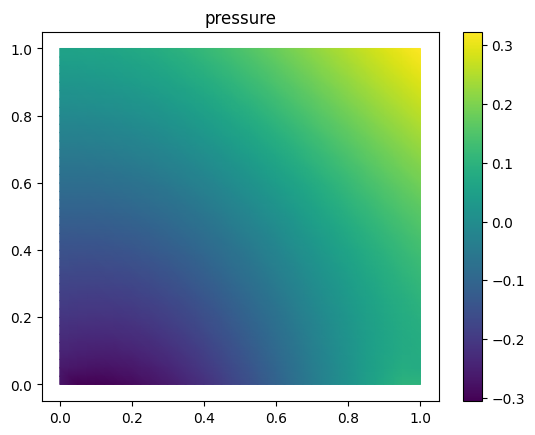

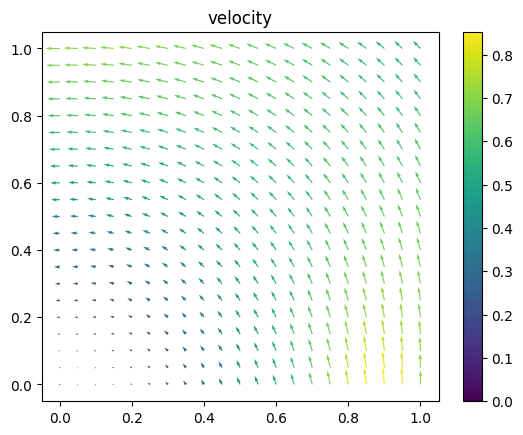

In [ ]:
fig, ax = plt.subplots()
col = tripcolor(ph, axes=ax)
plt.colorbar(col)
plt.title('pressure')
fig, ax = plt.subplots()
col = quiver(uh, axes=ax)
plt.colorbar(col)
plt.title('velocity')

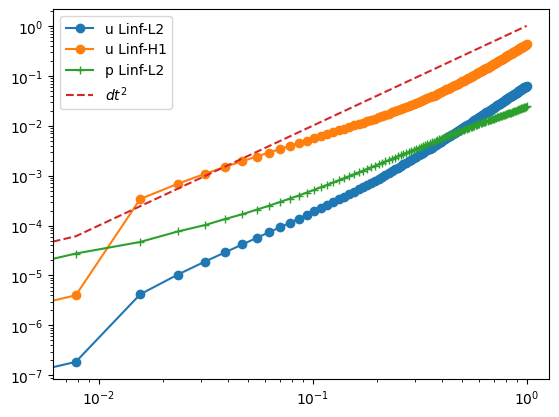

In [ ]:
plt.loglog(t_vec, err_u_LinfL2, marker='o', label='u Linf-L2')
plt.loglog(t_vec, err_u_LinfH1, marker='o', label='u Linf-H1')
plt.loglog(t_vec, err_p_LinfL2, marker='+', label='p Linf-L2')
plt.loglog(t_vec, t_vec**2, linestyle='--', label=r'$dt^2$')
plt.legend()

In [ ]:
OC_u_L2= err_u_LinfH1[1]
OC_p_L2=err_p_LinfL2[1]
print('OC u H1:',OC_u_L2)
print('OC p L2:',OC_p_L2)

OC u H1: 4.005828911492727e-06
OC p L2: 2.7525649359219504e-05
